# Collaborative filtering

We could recommend many things:

- products at online store
- music of films
- friends in social networks
- content in social networks

Whole recommendations field is based on similarity concept.  
The most simple way to compute similarity is by some geometrical distance between samples. To start with it could be distance in the original feature space.

Let's try several ways to construct recommender system with this in mind.

![Amazon](https://github.com/v-goncharenko/madmo-adv/raw/83af16ed575aa75377b31d2e1c67288b42f46db5/09_recommendations/images/amazon.jpg)

In case you need gentle recommender systems terms introduction here is a _very_ [simple introduction to basics of recommender systems by Google](https://developers.google.com/machine-learning/recommendation/overview)

![Imdb](https://github.com/v-goncharenko/madmo-adv/raw/255e43e0ee146c0b5c1c4cf9305abc0034fed5e2/09_recommendations/images/imdb.png)

In [4]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

## Data preparation


In [5]:
critics = {
    "Toby": {
        "Snakes on a Plane": 4.5,
        "You, Me and Dupree": 1.0,
        "Superman Returns": 4.0,
    },
    "Lisa Rose": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "Superman Returns": 3.5,
        "You, Me and Dupree": 2.5,
        "The Night Listener": 3.0,
    },
    "Gene Seymour": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 1.5,
        "Superman Returns": 5.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 3.5,
    },
    "Michael Phillips": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.0,
        "Superman Returns": 3.5,
        "The Night Listener": 4.0,
    },
    "Claudia Puig": {
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "The Night Listener": 4.5,
        "Superman Returns": 4.0,
        "You, Me and Dupree": 2.5,
    },
    "Mick LaSalle": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "Just My Luck": 2.0,
        "Superman Returns": 3.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 2.0,
    },
    "Jack Matthews": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "The Night Listener": 3.0,
        "Superman Returns": 5.0,
        "You, Me and Dupree": 3.5,
    },
}

## Similarity

We will discuss two similarities:

- Euclidean distance
- Pearson correlation

### Euclidean distance

$$
\begin{equation}
d(x, y) = \sqrt{\sum_{i = 1}^n (x_i - y_i)^2}
\end{equation}
$$

$$
\text{similarity }(x, y) = \dfrac{1}{1 + d(x, y)},
$$

In [7]:
from recommendations_tools import (
    calculate_similar_items,
    get_recommendations,
    get_recommended_items,
    similar_films,
)

In [8]:
def sim_distance(critics: dict, person1: str, person2: str) -> float:
    """Calculates euclidian distance based similarity score for persons"""
    sim_films = similar_films(critics, person1, person2)

    if len(sim_films) == 0:
        return 0

    sum_of_euclead_dist = 0

    for film in sim_films:
        sum_of_euclead_dist += pow(critics[person1][film] - critics[person2][film], 2)

    return 1 / (1 + sum_of_euclead_dist)

In [9]:
sim_distance(critics, "Lisa Rose", "Toby")

0.2222222222222222

In [10]:
import numpy as np

In [11]:
dist_sim_vals = np.zeros((len(critics), len(critics)))

for i, source in enumerate(critics):
    for j, referer in enumerate(critics):
        dist_sim_vals[i, j] = sim_distance(critics, source, referer)

dist_sim_vals.round(3)

array([[1.   , 0.222, 0.108, 0.286, 0.235, 0.308, 0.118],
       [0.222, 1.   , 0.148, 0.444, 0.286, 0.333, 0.211],
       [0.108, 0.148, 1.   , 0.211, 0.133, 0.129, 0.8  ],
       [0.286, 0.444, 0.211, 1.   , 0.571, 0.286, 0.182],
       [0.235, 0.286, 0.133, 0.571, 1.   , 0.174, 0.182],
       [0.308, 0.333, 0.129, 0.286, 0.174, 1.   , 0.138],
       [0.118, 0.211, 0.8  , 0.182, 0.182, 0.138, 1.   ]])

In [12]:
dist_sim_vals.mean(), dist_sim_vals.std()

(0.36752489116590853, 0.29939374254643875)

In [13]:
tirangle_mask = np.tri(len(critics), k=-1, dtype=np.bool_)

norm_dist_sim_vals = dist_sim_vals[tirangle_mask]

norm_dist_sim_vals.round(3)

array([0.222, 0.108, 0.148, 0.286, 0.444, 0.211, 0.235, 0.286, 0.133,
       0.571, 0.308, 0.333, 0.129, 0.286, 0.174, 0.118, 0.211, 0.8  ,
       0.182, 0.182, 0.138])

In [14]:
norm_dist_sim_vals.mean(), norm_dist_sim_vals.std()

(0.26211237302689333, 0.16368706645842943)

In [15]:
import matplotlib.pyplot as plt


def plot_pdf(values: np.ndarray, title: str):
    """Plots `values` distribution density"""
    plt.figure(figsize=(10, 5))
    plt.violinplot(values.flatten(), vert=False, showmedians=True)
    plt.xlabel("Similarity")
    plt.grid()
    plt.title(title)
    plt.show()

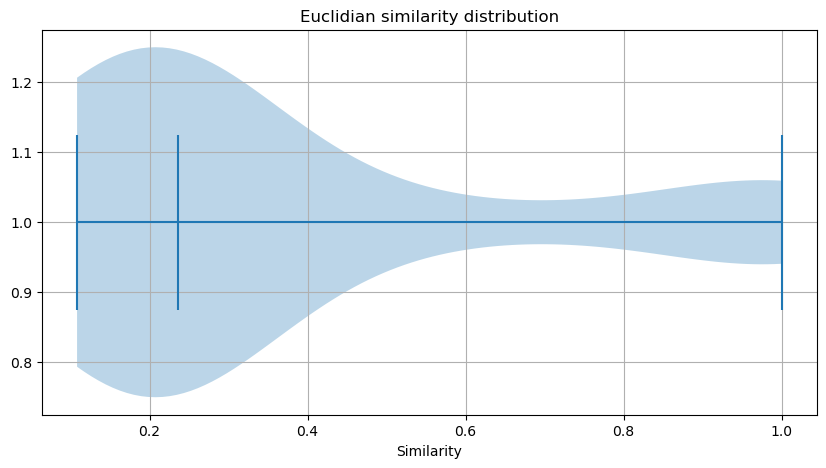

In [16]:
plot_pdf(dist_sim_vals, "Euclidian similarity distribution")

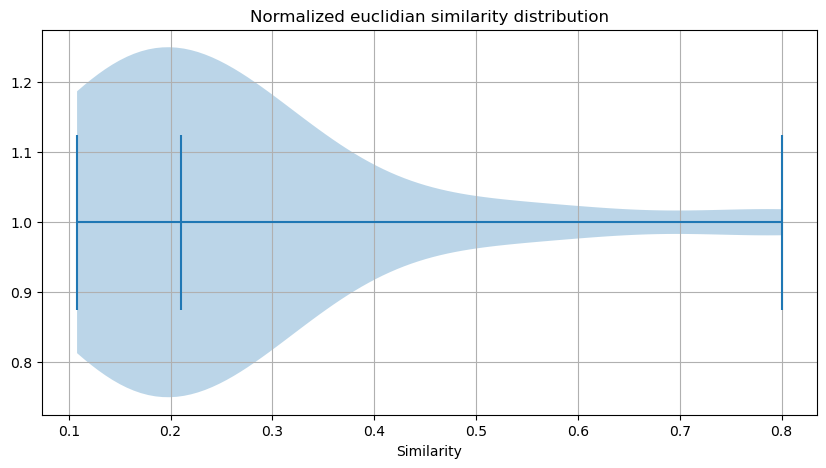

In [17]:
plot_pdf(norm_dist_sim_vals, "Normalized euclidian similarity distribution")

$$
\text{similarity}(x, y) = \dfrac{1}{1 + d(x, y)}
$$



### Pearson


![](https://github.com/v-goncharenko/madmo-adv/raw/255e43e0ee146c0b5c1c4cf9305abc0034fed5e2/09_recommendations/images/pearson.jpg)


$$
\bar{x} = \frac{1}{n} \sum_{j = 1}^n x_j ;\ \bar{y} = \frac{1}{n} \sum_{j = 1}^n y_j \\
\text{corr}(x, y) = \dfrac{\sum_{i = 1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i = 1}^n (x_i - \bar{x})^2 \sum_{i = 1}^n (y_i - \bar{y})^2}}
$$

In [18]:
from math import isnan

from scipy.stats import pearsonr


def sim_pearson(critics_dict, person1, person2):
    """Calculates pearson correlation based similarity between persons"""
    sim_films = similar_films(critics_dict, person1, person2)

    if not len(sim_films):
        return 0

    scores1 = []
    scores2 = []
    for film in sim_films:
        scores1.append(critics_dict[person1][film])
        scores2.append(critics_dict[person2][film])

    correlation = pearsonr(scores1, scores2)[0]

    if isnan(correlation):
        correlation = 0

    return correlation

In [19]:
sim_pearson(critics, "Lisa Rose", "Gene Seymour")

0.39605901719066977

In [20]:
sim_pearson(critics, "Lisa Rose", "Toby")

0.9912407071619302

Исследуем распределение такой величины схожести

In [21]:
dist_pear_vals = np.zeros((len(critics), len(critics)))

for i, source in enumerate(critics):
    for j, referer in enumerate(critics):
        dist_pear_vals[i, j] = sim_pearson(critics, source, referer)

dist_pear_vals.round(3)

array([[ 1.   ,  0.991,  0.381, -1.   ,  0.893,  0.924,  0.663],
       [ 0.991,  1.   ,  0.396,  0.405,  0.567,  0.594,  0.747],
       [ 0.381,  0.396,  1.   ,  0.205,  0.315,  0.412,  0.964],
       [-1.   ,  0.405,  0.205,  1.   ,  1.   , -0.258,  0.135],
       [ 0.893,  0.567,  0.315,  1.   ,  1.   ,  0.567,  0.029],
       [ 0.924,  0.594,  0.412, -0.258,  0.567,  1.   ,  0.211],
       [ 0.663,  0.747,  0.964,  0.135,  0.029,  0.211,  1.   ]])

In [22]:
dist_pear_vals.mean(), dist_pear_vals.std()

(0.5159356584296166, 0.4713252827635987)

In [23]:
tirangle_mask = np.tri(len(critics), k=-1, dtype=np.bool_)

norm_pear_sim_vals = dist_pear_vals[tirangle_mask]

norm_pear_sim_vals.round(3)

array([ 0.991,  0.381,  0.396, -1.   ,  0.405,  0.205,  0.893,  0.567,
        0.315,  1.   ,  0.924,  0.594,  0.412, -0.258,  0.567,  0.663,
        0.747,  0.964,  0.135,  0.029,  0.211])

In [24]:
norm_pear_sim_vals.mean(), norm_pear_sim_vals.std()

(0.43525826816788604, 0.462179856879093)

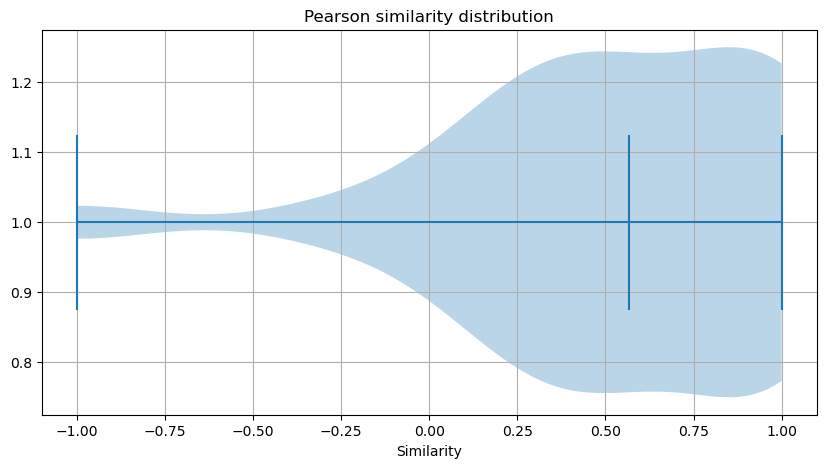

In [25]:
plot_pdf(dist_pear_vals, "Pearson similarity distribution")

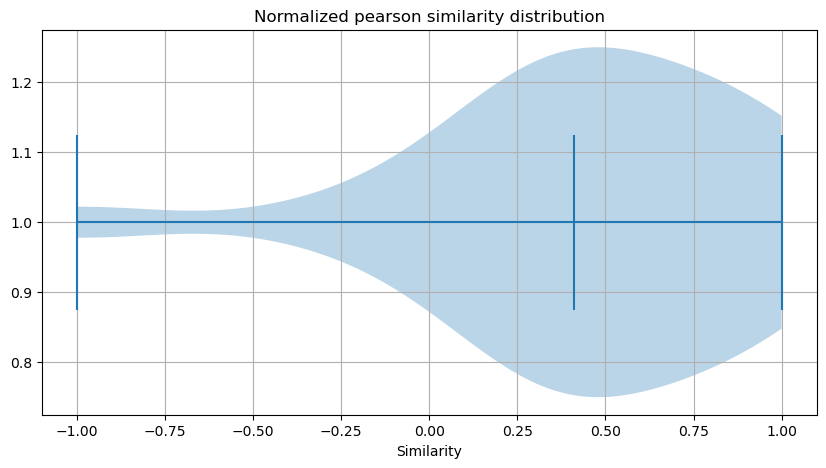

In [26]:
plot_pdf(norm_pear_sim_vals, "Normalized pearson similarity distribution")

## Ranking

In [27]:
from typing import Callable


def top_matches(
    critics: dict, person: str, n: int = 5, similarity_fn: Callable = sim_pearson
):
    """Retruns top-n most similar critics"""
    scores = []

    for other in critics:
        if other == person:
            continue

        similarity_score = similarity_fn(critics, person, other)
        scores.append((similarity_score, other))

    scores.sort(reverse=True)

    return scores[0:n]

In [28]:
top_matches(critics, "Toby", n=3, similarity_fn=sim_pearson)

[(0.9912407071619302, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415642, 'Claudia Puig')]

In [29]:
pp.pprint(
    {k: v for k, v in critics.items() if k in ("Toby", "Mick LaSalle", "Lisa Rose")}
)

{   'Lisa Rose': {   'Just My Luck': 3.0,
                     'Lady in the Water': 2.5,
                     'Snakes on a Plane': 3.5,
                     'Superman Returns': 3.5,
                     'The Night Listener': 3.0,
                     'You, Me and Dupree': 2.5},
    'Mick LaSalle': {   'Just My Luck': 2.0,
                        'Lady in the Water': 3.0,
                        'Snakes on a Plane': 4.0,
                        'Superman Returns': 3.0,
                        'The Night Listener': 3.0,
                        'You, Me and Dupree': 2.0},
    'Toby': {   'Snakes on a Plane': 4.5,
                'Superman Returns': 4.0,
                'You, Me and Dupree': 1.0}}


In [30]:
top_matches(critics, "Toby", n=3, similarity_fn=sim_distance)

[(0.3076923076923077, 'Mick LaSalle'),
 (0.2857142857142857, 'Michael Phillips'),
 (0.23529411764705882, 'Claudia Puig')]

## User-based approach

In [32]:
get_recommendations(critics, "Toby", sim_pearson)

[(3.347789526713101, 'The Night Listener'),
 (2.832549918264162, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

In [33]:
critics["Toby"]

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [34]:
get_recommendations(critics, "Toby", sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

## Item-based collaborative filtering

In [42]:
itemsim = calculate_similar_items(critics, n=4)

In [43]:
pp.pprint(itemsim)

{   'Just My Luck': [   (0.2222222222222222, 'Lady in the Water'),
                        (0.18181818181818182, 'You, Me and Dupree'),
                        (0.15384615384615385, 'The Night Listener'),
                        (0.10526315789473684, 'Snakes on a Plane')],
    'Lady in the Water': [   (0.4, 'You, Me and Dupree'),
                             (0.2857142857142857, 'The Night Listener'),
                             (0.2222222222222222, 'Snakes on a Plane'),
                             (0.2222222222222222, 'Just My Luck')],
    'Snakes on a Plane': [   (0.2222222222222222, 'Lady in the Water'),
                             (0.18181818181818182, 'The Night Listener'),
                             (0.16666666666666666, 'Superman Returns'),
                             (0.10526315789473684, 'Just My Luck')],
    'Superman Returns': [   (0.16666666666666666, 'Snakes on a Plane'),
                            (0.10256410256410256, 'The Night Listener'),
                       

In [47]:
itemsim["Superman Returns"]

[(0.16666666666666666, 'Snakes on a Plane'),
 (0.10256410256410256, 'The Night Listener'),
 (0.09090909090909091, 'Lady in the Water'),
 (0.06451612903225806, 'Just My Luck')]

In [48]:
critics["Toby"]

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [49]:
get_recommended_items(critics, itemsim, "Toby")

[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]